In [193]:
import re
import os
from collections import Counter
from progressbar import progressbar
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
import time

In [167]:
PATH_TO_CORPUS = "F:\\IR Lab\\classics\\"

In [169]:
def tokenize(file_text, limit = 3):
    stopwords = open("F:\\IR Lab\\stopwords.txt","r", encoding = "utf-8").read().split("\n")
    text = re.sub(r'\s+\n', ' ', file_text)
    pattern = re.compile(r"^\w*[-']?\w*$")
    better_tokens = list(filter(pattern.match, text.split(" ")))
    token_list = [ele.lower() for ele in better_tokens if len(ele) > limit and ele.lower() not in stopwords]
    return list(set(token_list))

In [172]:
files = os.listdir(PATH_TO_CORPUS)
tokens = []
index = {}
vocab = []
vocabplot = []

bar = progressbar.ProgressBar(len(files)-1).start()

for i, file in enumerate(files):
    filetext = open(PATH_TO_CORPUS + file, "r", encoding = "utf-8").read()
    token = tokenize(filetext)
    tokens.append(token)
    
    for term in token:
        if index.get(term) != None:
            index[term].append(i)
        else:
            index[term] = [i]

    vocab.extend(token)
    vocab = list(set(vocab))
    vocabplot.append(len(vocab))
    bar.update(i)

Text(0.5, 1.0, 'Increase in Vocab Size with Document Number')

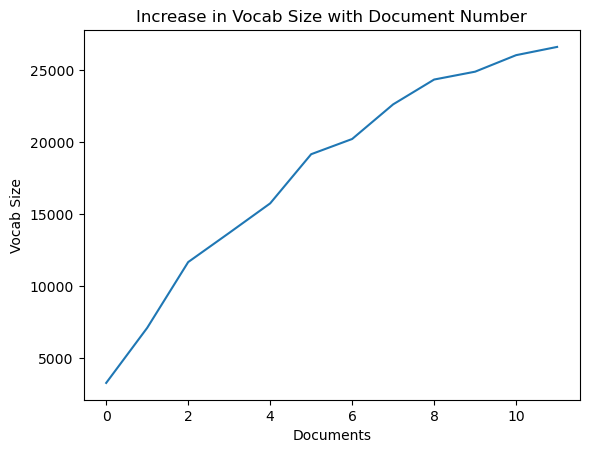

In [173]:
sns.lineplot(x = range(0,12), y = vocabplot)
plt.xlabel("Documents")
plt.ylabel("Vocab Size")
plt.title("Increase in Vocab Size with Document Number")

In [189]:
def intersect(p1, p2):
    
    pt1 = 0
    pt2 = 0
    ans = []
    
    while pt1 < len(p1) and pt2 < len(p2):
        if p1[pt1] == p2[pt2] :
            ans.append(p2[pt2])
            pt1 = pt1 + 1
            pt2 = pt2 + 1
        elif p1[pt1] < p2[pt2]:
            pt1 = pt1 + 1
        else:
            pt2 = pt2 + 1
    return ans
            

def IR_merge(query,index):
    res = []
    qterms = query.split("and")
    qterms = [i.strip() for i in qterms]
    for ele in qterms:
        if index.get(ele) != None:
            res.append(index[ele])
    res.sort(key=lambda x: len(x))
    
    temp = res[0]
    bar = progressbar.ProgressBar(len(res)-1).start()
    for i in range(1,len(res)):
        p  = res[i]
        temp = intersect(p,temp)
        bar.update(i)
    
    print(temp)

In [194]:
start = time.time()
IR_merge("rich and filthy",index)
end = time.time()
print("time : ", (end - start)*1000, " ms ")

[3, 5, 7, 8, 9]
time :  6.994962692260742  ms 


In [192]:
with open("index.pkl", "wb") as f:
    pkl.dump(index, f)

In [195]:
start = time.time()
with open("index.pkl", "rb") as f:
    ind = pkl.load(f)
    IR_merge("rich and filthy",index)
    
end = time.time()
print("time : ", (end - start)*1000, " ms ")

[3, 5, 7, 8, 9]
time :  1149.432897567749  ms 
